# Heart Disease Prediction using Machine learning

### Import the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

#import the warnings:
import warnings
warnings.filterwarnings('ignore')

### Import the dataset

In [3]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# Information about the dataset

print("Dataset Information:", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
Dataset Information: None


In [5]:
#Shape of the dataset:

print("Shape of the Dataset:", df.shape)

Shape of the Dataset: (1025, 14)


In [6]:
# Describe the dataset:

pd.set_option("display.float", "{:.2f}".format)

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [7]:
#Checking the null values in the dataset:

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# Checking the duplicate values:

df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

In [9]:
# dataset value count:
df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [ ]:
# Make a plot between heart disease and count values:
import hvplot.pandas
df.target.value_counts().hvplot.bar(
    title='Heart Disease Count',
    xlabel='Heart Disease',
    ylabel='Count',
    width=500,
    height=350
)

:Bars   [target]   (count)

In [11]:
# Check the columns in the dataset:
print(df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [12]:
# Generate the categorical columns in the dataset:
categorical_val = []
continous_val = []
for col in df.columns:
    if len(df[col].unique()) <= 10:
        categorical_val.append(col)
    else:
        continous_val.append(col) 

categorical_val           

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [13]:
continous_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [74]:
df['target']

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

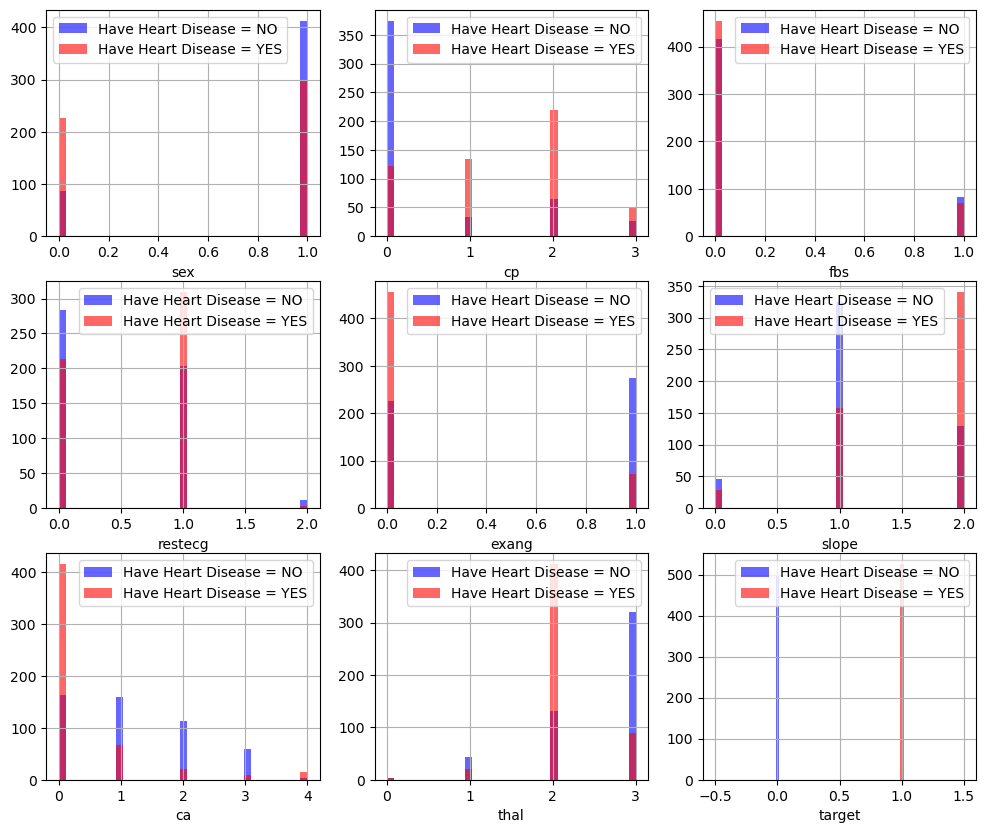

In [14]:
plt.figure(figsize=(12, 10))

for i, col in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][col].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][col].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(col)

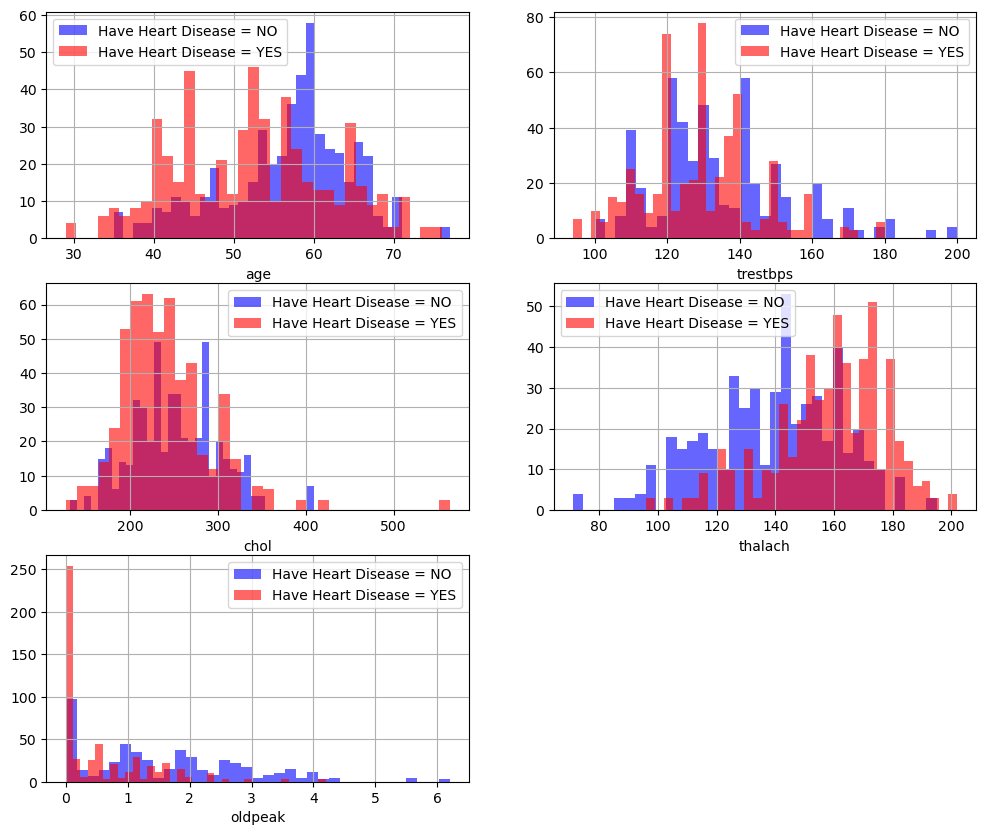

In [15]:
plt.figure(figsize=(12, 10))

for i, col in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][col].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][col].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(col)

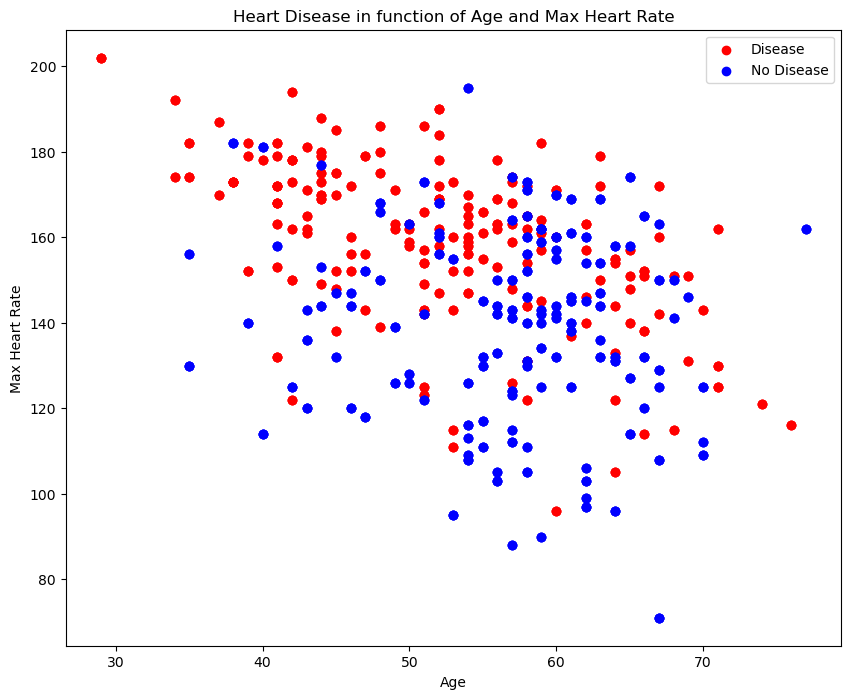

In [16]:
# Create another figure
plt.figure(figsize=(10, 8))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="red")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="blue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

In [17]:
# Check the correlation Matrix:
corr_matrix = df.corr()
print(corr_matrix)

           age   sex    cp  trestbps  chol   fbs  restecg  thalach  exang  \
age       1.00 -0.10 -0.07      0.27  0.22  0.12    -0.13    -0.39   0.09   
sex      -0.10  1.00 -0.04     -0.08 -0.20  0.03    -0.06    -0.05   0.14   
cp       -0.07 -0.04  1.00      0.04 -0.08  0.08     0.04     0.31  -0.40   
trestbps  0.27 -0.08  0.04      1.00  0.13  0.18    -0.12    -0.04   0.06   
chol      0.22 -0.20 -0.08      0.13  1.00  0.03    -0.15    -0.02   0.07   
fbs       0.12  0.03  0.08      0.18  0.03  1.00    -0.10    -0.01   0.05   
restecg  -0.13 -0.06  0.04     -0.12 -0.15 -0.10     1.00     0.05  -0.07   
thalach  -0.39 -0.05  0.31     -0.04 -0.02 -0.01     0.05     1.00  -0.38   
exang     0.09  0.14 -0.40      0.06  0.07  0.05    -0.07    -0.38   1.00   
oldpeak   0.21  0.08 -0.17      0.19  0.06  0.01    -0.05    -0.35   0.31   
slope    -0.17 -0.03  0.13     -0.12 -0.01 -0.06     0.09     0.40  -0.27   
ca        0.27  0.11 -0.18      0.10  0.07  0.14    -0.08    -0.21   0.11   

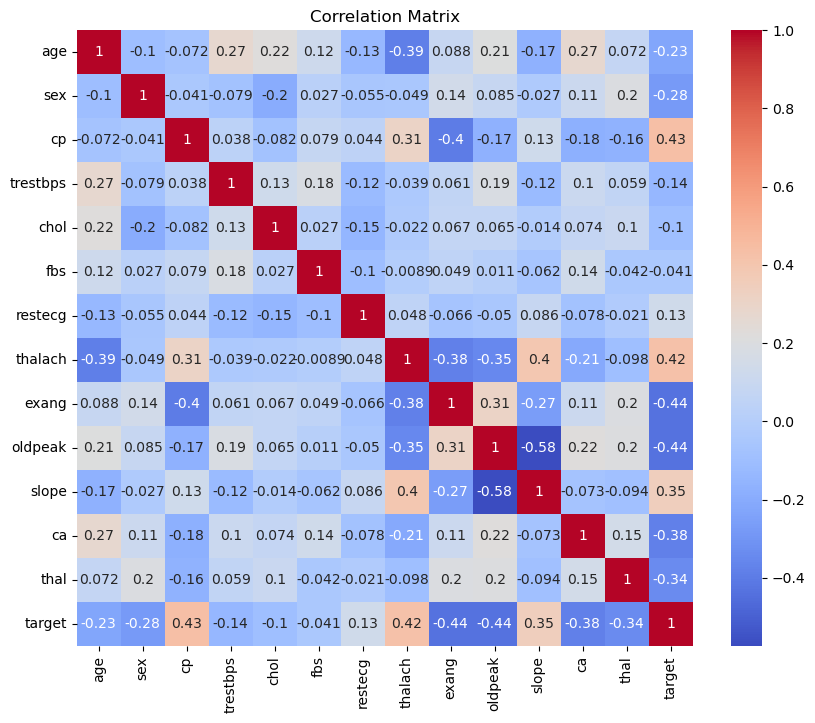

In [18]:
#Generate a plot between the correlated Matrix:

plt.figure(figsize=(10,8))
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

## Data Preprocessing

In [ ]:
categorical_val.remove('target')

dataset = pd.get_dummies(dataset, columns=["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"])


In [20]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.00,0,False,True,True,False,...,True,False,False,True,False,False,False,False,False,True
1,53,140,203,155,3.10,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
2,70,145,174,125,2.60,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
3,61,148,203,161,0.00,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
4,62,138,294,106,1.90,0,True,False,True,False,...,False,False,False,False,True,False,False,False,True,False


In [21]:
print(df.columns)
print(dataset.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')


In [ ]:
#Convert the Categorical columns into the numerical values:

from sklearn.preprocessing import LabelEncoder

categorical_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
le = LabelEncoder()
for col in categorical_cols:
    dataset[col] = le.fit_transform(dataset[col])


In [ ]:
from sklearn.preprocessing import StandardScaler

ssc = StandardScaler()
num_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]
dataset[num_cols] = ssc.fit_transform(dataset[num_cols])


In [23]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.27,-0.38,-0.66,0.82,-0.06,0,False,True,True,False,...,True,False,False,True,False,False,False,False,False,True
1,-0.16,0.48,-0.83,0.26,1.73,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
2,1.72,0.76,-1.40,-1.05,1.30,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
3,0.72,0.94,-0.83,0.52,-0.91,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
4,0.83,0.36,0.93,-1.87,0.71,0,True,False,True,False,...,False,False,False,False,True,False,False,False,True,False


In [24]:
# Define the function of calculate the train and test values with confusion matrix, accuracy, precision, recall, f1-score and classification reports

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
        

In [25]:
X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 1.Random Forest Classifier

In [26]:
# Apply the random forest classfier:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print_score(rf, X_train, y_train, X_test, y_test, train=True)
print_score(rf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   340.00 377.00      1.00     717.00        717.00
_______________________________________________
Confusion Matrix: 
 [[340   0]
 [  0 377]]

Test Result:
Accuracy Score: 99.03%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.98   1.00      0.99       0.99          0.99
recall      1.00   0.98      0.99       0.99          0.99
f1-score    0.99   0.99      0.99       0.99          0.99
support   159.00 149.00      0.99     308.00        308.00
_______________________________________________
Confusion Matrix: 
 [[159   0]
 [  3 146]]



## 2.Logistic Regression 

In [27]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

print_score(lr, X_train, y_train, X_test, y_test, train=True)
print_score(lr, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 89.54%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.91   0.89      0.90       0.90          0.90
recall      0.87   0.92      0.90       0.89          0.90
f1-score    0.89   0.90      0.90       0.89          0.90
support   340.00 377.00      0.90     717.00        717.00
_______________________________________________
Confusion Matrix: 
 [[295  45]
 [ 30 347]]

Test Result:
Accuracy Score: 81.82%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.85   0.79      0.82       0.82          0.82
recall      0.79   0.85      0.82       0.82          0.82
f1-score    0.82   0.82      0.82       0.82          0.82
support   159.00 149.00      0.82     308.00        308.00
_______________________________________________
Confusion Matrix: 
 [[125  34]
 [ 22 127]]



## 3.XGBoost Classifier

In [28]:
xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   340.00 377.00      1.00     717.00        717.00
_______________________________________________
Confusion Matrix: 
 [[340   0]
 [  0 377]]

Test Result:
Accuracy Score: 98.05%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.96   1.00      0.98       0.98          0.98
recall      1.00   0.96      0.98       0.98          0.98
f1-score    0.98   0.98      0.98       0.98          0.98
support   159.00 149.00      0.98     308.00        308.00
_______________________________________________
Confusion Matrix: 
 [[159   0]
 [  6 143]]



## 4.Support Vector Machine (SVM) Classifier

In [29]:
svm_c = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_c.fit(X_train, y_train)

print_score(svm_c, X_train, y_train, X_test, y_test, train=True)
print_score(svm_c, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 95.40%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.97   0.94      0.95       0.96          0.95
recall      0.93   0.97      0.95       0.95          0.95
f1-score    0.95   0.96      0.95       0.95          0.95
support   340.00 377.00      0.95     717.00        717.00
_______________________________________________
Confusion Matrix: 
 [[317  23]
 [ 10 367]]

Test Result:
Accuracy Score: 90.26%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.94   0.87      0.90       0.90          0.91
recall      0.86   0.95      0.90       0.90          0.90
f1-score    0.90   0.90      0.90       0.90          0.90
support   159.00 149.00      0.90     308.00        308.00
_______________________________________________
Confusion Matrix: 
 [[137  22]
 [  8 141]]



## 5.Decision Tree Classifier

In [30]:
dt_c = DecisionTreeClassifier(random_state=42)
dt_c.fit(X_train, y_train)

print_score(dt_c, X_train, y_train, X_test, y_test, train=True)
print_score(dt_c, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   340.00 377.00      1.00     717.00        717.00
_______________________________________________
Confusion Matrix: 
 [[340   0]
 [  0 377]]

Test Result:
Accuracy Score: 97.08%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.95   1.00      0.97       0.97          0.97
recall      1.00   0.94      0.97       0.97          0.97
f1-score    0.97   0.97      0.97       0.97          0.97
support   159.00 149.00      0.97     308.00        308.00
_______________________________________________
Confusion Matrix: 
 [[159   0]
 [  9 140]]



## 6.Navie Bayes Classifier

In [31]:
# Applying the Navie Bayes Classifier:

nbc = GaussianNB()
nbc.fit(X_train, y_train)

print_score(nbc, X_train, y_train, X_test, y_test, train=True)
print_score(nbc, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 82.15%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.93   0.76      0.82       0.85          0.84
recall      0.67   0.96      0.82       0.81          0.82
f1-score    0.78   0.85      0.82       0.82          0.82
support   340.00 377.00      0.82     717.00        717.00
_______________________________________________
Confusion Matrix: 
 [[228 112]
 [ 16 361]]

Test Result:
Accuracy Score: 77.92%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.90   0.71      0.78       0.81          0.81
recall      0.64   0.93      0.78       0.78          0.78
f1-score    0.75   0.80      0.78       0.78          0.78
support   159.00 149.00      0.78     308.00        308.00
_______________________________________________
Confusion Matrix: 
 [[102  57]
 [ 11 138]]



## 7.K-Nearst Neighbor Classifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn_c = KNeighborsClassifier()
knn_c.fit(X_train, y_train)

print_score(knn_c, X_train, y_train, X_test, y_test, train=True)
print_score(knn_c, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 91.77%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.91   0.92      0.92       0.92          0.92
recall      0.91   0.92      0.92       0.92          0.92
f1-score    0.91   0.92      0.92       0.92          0.92
support   340.00 377.00      0.92     717.00        717.00
_______________________________________________
Confusion Matrix: 
 [[310  30]
 [ 29 348]]

Test Result:
Accuracy Score: 81.82%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.86   0.78      0.82       0.82          0.82
recall      0.77   0.87      0.82       0.82          0.82
f1-score    0.81   0.82      0.82       0.82          0.82
support   159.00 149.00      0.82     308.00        308.00
_______________________________________________
Confusion Matrix: 
 [[123  36]
 [ 20 129]]



### Combine the all results into a Table:

In [33]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Assuming you have already defined and trained your classifiers: knn_c, lr, svm_c, dt_c, rf, xgb_clf

# Initialize an empty list to hold results
results = []

# K-nearest neighbors
train_score = accuracy_score(y_train, knn_c.predict(X_train)) * 100
test_score = accuracy_score(y_test, knn_c.predict(X_test)) * 100
results.append(["K-nearest neighbors", train_score, test_score])

# Logistic Regression
train_score = accuracy_score(y_train, lr.predict(X_train)) * 100
test_score = accuracy_score(y_test, lr.predict(X_test)) * 100
results.append(["Logistic Regression", train_score, test_score])

# Support Vector Machine
train_score = accuracy_score(y_train, svm_c.predict(X_train)) * 100
test_score = accuracy_score(y_test, svm_c.predict(X_test)) * 100
results.append(["Support Vector Machine", train_score, test_score])

# Decision Tree Classifier
train_score = accuracy_score(y_train, dt_c.predict(X_train)) * 100
test_score = accuracy_score(y_test, dt_c.predict(X_test)) * 100
results.append(["Decision Tree Classifier", train_score, test_score])

# Random Forest Classifier
train_score = accuracy_score(y_train, rf.predict(X_train)) * 100
test_score = accuracy_score(y_test, rf.predict(X_test)) * 100
results.append(["Random Forest Classifier", train_score, test_score])

# XGBoost Classifier
train_score = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100
test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100
results.append(["XGBoost Classifier", train_score, test_score])

# Naive Bayes Classifier
train_score = accuracy_score(y_train, nbc.predict(X_train)) * 100
test_score = accuracy_score(y_test, nbc.predict(X_test)) * 100
results.append(["Naive Bayes Classifier", train_score, test_score])

# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

# Display the combined results
print(results_df)

                      Model  Training Accuracy %  Testing Accuracy %
0       K-nearest neighbors                91.77               81.82
1       Logistic Regression                89.54               81.82
2    Support Vector Machine                95.40               90.26
3  Decision Tree Classifier               100.00               97.08
4  Random Forest Classifier               100.00               99.03
5        XGBoost Classifier               100.00               98.05
6    Naive Bayes Classifier                82.15               77.92


# Models Hyperparameter Tuning

### 1.Logistic Regression Hyperparameter Tuning

In [34]:
from sklearn.model_selection import GridSearchCV

paramts = {
    "C" : np.logspace(-4, 4, 20), 
    "solver" : ["liblinear"]}

lr_c = LogisticRegression()

lr_cv = GridSearchCV(lr_c, paramts, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)


lr_cv.fit(X_train, y_train)


best_params = lr_cv.best_params_

print(f"Best parameters: {best_params}")


lr_c = LogisticRegression(**best_params)

lr_c.fit(X_train, y_train)


print_score(lr_c, X_train, y_train, X_test, y_test, train=True)
print_score(lr_c, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'C': np.float64(0.08858667904100823), 'solver': 'liblinear'}
Train Result:
Accuracy Score: 88.84%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.89   0.89      0.89       0.89          0.89
recall      0.87   0.90      0.89       0.89          0.89
f1-score    0.88   0.90      0.89       0.89          0.89
support   340.00 377.00      0.89     717.00        717.00
_______________________________________________
Confusion Matrix: 
 [[296  44]
 [ 36 341]]

Test Result:
Accuracy Score: 82.14%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.86   0.79      0.82       0.82          0.83
recall      0.78   0.87      0.82       0.82          0.82
f1-score    0.82   0.82      0.82       0.82          0.82
support   159.00 149.

### 2.K Nearst Neighbour Hyperparameter Tuning

Maximum KNN score on the test data: 100.00%


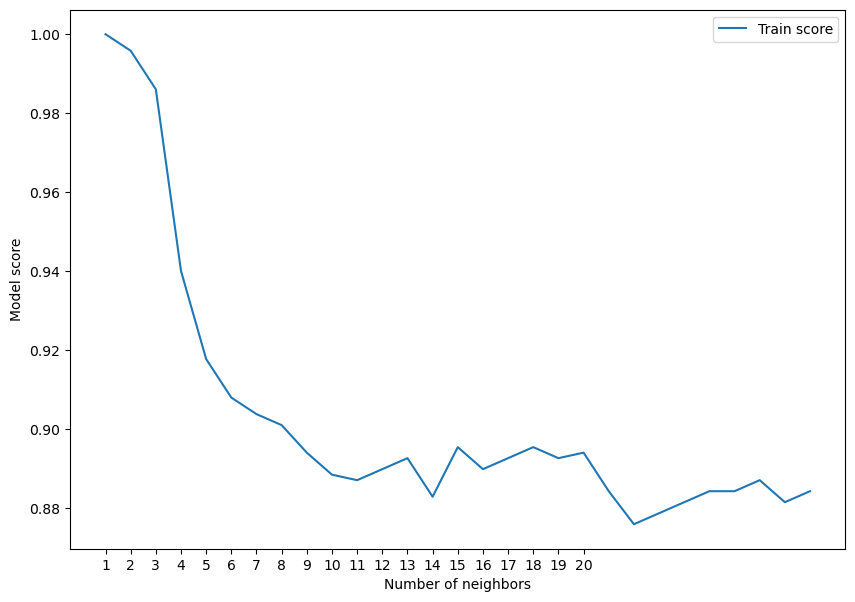

In [35]:
train_score = []
test_score = []
neighbors = range(1, 30)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, model.predict(X_train)))



plt.figure(figsize=(10, 7))

plt.plot(neighbors, train_score, label="Train score")
# plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(train_score)*100:.2f}%")

In [36]:
knn_clf = KNeighborsClassifier(n_neighbors=27)
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 88.70%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.90   0.88      0.89       0.89          0.89
recall      0.86   0.92      0.89       0.89          0.89
f1-score    0.88   0.89      0.89       0.89          0.89
support   340.00 377.00      0.89     717.00        717.00
_______________________________________________
Confusion Matrix: 
 [[291  49]
 [ 32 345]]

Test Result:
Accuracy Score: 83.44%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.90   0.78      0.83       0.84          0.84
recall      0.77   0.91      0.83       0.84          0.83
f1-score    0.83   0.84      0.83       0.83          0.83
support   159.00 149.00      0.83     308.00        308.00
_______________________________________________
Confusion Matrix: 
 [[122  37]
 [ 14 135]]



### 3.Support Vector Machine Hyperparameter Tune

In [37]:
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)

params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "kernel":('linear', 'poly', 'rbf')}

svm_cv = GridSearchCV(svm_clf, params, n_jobs=-1, cv=5, verbose=1, scoring="accuracy")
svm_cv.fit(X_train, y_train)
best_params = svm_cv.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 147 candidates, totalling 735 fits
Best params: {'C': 2, 'gamma': 0.5, 'kernel': 'rbf'}
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   340.00 377.00      1.00     717.00        717.00
_______________________________________________
Confusion Matrix: 
 [[340   0]
 [  0 377]]

Test Result:
Accuracy Score: 98.05%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.96   1.00      0.98       0.98          0.98
recall      1.00   0.96      0.98       0.98          0.98
f1-score    0.98   0.98      0.98       0.98          0.98
support   159.00 149.00      0.98     308.00 

### 4.Decision Tree Classifier Hyperparameter Tune

In [38]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}')

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 4332 candidates, totalling 21660 fits


Best_params: {'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   340.00 377.00      1.00     717.00        717.00
_______________________________________________
Confusion Matrix: 
 [[340   0]
 [  0 377]]

Test Result:
Accuracy Score: 97.08%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.95   1.00      0.97       0.97          0.97
recall      1.00   0.94      0.97       0.97          0.97
f1-score    0.97   0.97      0.97       0.97          0.97
support   159.00 149.00      0.97     308.

### 5.Random Forest Classifier Hyperparameter Tune

In [39]:
n_estimators = [500, 900, 1100, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5, 10, 15, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
              }

rf_clf = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=5, verbose=1, n_jobs=-1)
rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   340.00 377.00      1.00     717.00        717.00
_______________________________________________
Confusion Matrix: 
 [[340   0]
 [  0 377]]

Test Result:
Accuracy Score: 98.05%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.96   1.00      0.98       0.98          0.98
recall      1.00   0.96      0.98       0.98          0.98
f1-score    0.98   0.98      

### 6.XGBoost Classifier Hyperparameter Tune

In [40]:
from scipy import stats
param_grid = dict(
    n_estimators=stats.randint(10, 1000),
    max_depth=stats.randint(1, 10),
    learning_rate=stats.uniform(0, 1)
)

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_cv = RandomizedSearchCV(
    xgb_clf, param_grid, cv=5, n_iter=150, 
    scoring='accuracy', n_jobs=-1, verbose=1
)
xgb_cv.fit(X_train, y_train)
best_params = xgb_cv.best_params_
print(f"Best paramters: {best_params}")

xgb_clf = XGBClassifier(**best_params)
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best paramters: {'learning_rate': np.float64(0.9714964159867925), 'max_depth': 6, 'n_estimators': 393}
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   340.00 377.00      1.00     717.00        717.00
_______________________________________________
Confusion Matrix: 
 [[340   0]
 [  0 377]]

Test Result:
Accuracy Score: 98.05%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.96   1.00      0.98       0.98          0.98
recall      1.00   0.96      0.98       0.98          0.98
f1-score    0.98   0.98      0.98       0.98          

### 7.Naive Bayes Classifier Hyperparameter Tune

In [41]:
# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Define hyperparameter grid
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Example hyperparameters
}

# Set up GridSearchCV
gnb = GridSearchCV(estimator=gnb, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=1)

# Fit the model
gnb.fit(X_train, y_train)

best_params = gnb.best_params_

# Best parameters
print("Best Hyperparameters:", gnb.best_params_)

# Evaluate the best model
best_model = gnb.best_estimator_
gnb_clf = GaussianNB(**best_params)
gnb_clf.fit(X_train, y_train)

print_score(gnb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(gnb_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters: {'var_smoothing': 1e-05}
Train Result:
Accuracy Score: 83.96%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.88   0.81      0.84       0.85          0.84
recall      0.76   0.91      0.84       0.84          0.84
f1-score    0.82   0.86      0.84       0.84          0.84
support   340.00 377.00      0.84     717.00        717.00
_______________________________________________
Confusion Matrix: 
 [[259  81]
 [ 34 343]]

Test Result:
Accuracy Score: 80.52%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.90   0.74      0.81       0.82          0.82
recall      0.70   0.92      0.81       0.81          0.81
f1-score    0.79   0.82      0.81       0.80          0.80
support   159.00 149.00      0.81     308.00        308

In [42]:
# Dictionary to store model scores
results = {
    "Model": [],
    "Train Accuracy": [],
    "Test Accuracy": []
}

# Define model names and variables
models = {
    "Logistic Regression": lr_c,
    "K-Nearest Neighbors": knn_clf,
    "Support Vector Machine": svm_clf,
    "Decision Tree": tree_clf,
    "Random Forest": rf_clf,
    "XGBoost": xgb_clf,
    "Naive Bayes": gnb_clf
}

# Loop through models and collect scores
for name, model in models.items():
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    results["Model"].append(name)
    results["Train Accuracy"].append(round(train_acc, 4))
    results["Test Accuracy"].append(round(test_acc, 4))

# Create DataFrame
results_df = pd.DataFrame(results)

# Display the table
print(results_df)


                    Model  Train Accuracy  Test Accuracy
0     Logistic Regression            0.89           0.82
1     K-Nearest Neighbors            0.89           0.83
2  Support Vector Machine            1.00           0.98
3           Decision Tree            1.00           0.97
4           Random Forest            1.00           0.98
5                 XGBoost            1.00           0.98
6             Naive Bayes            0.84           0.81


### Feature Importance through Random Forest Classifier and XGBoost Classifier

In [43]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

<Axes: >

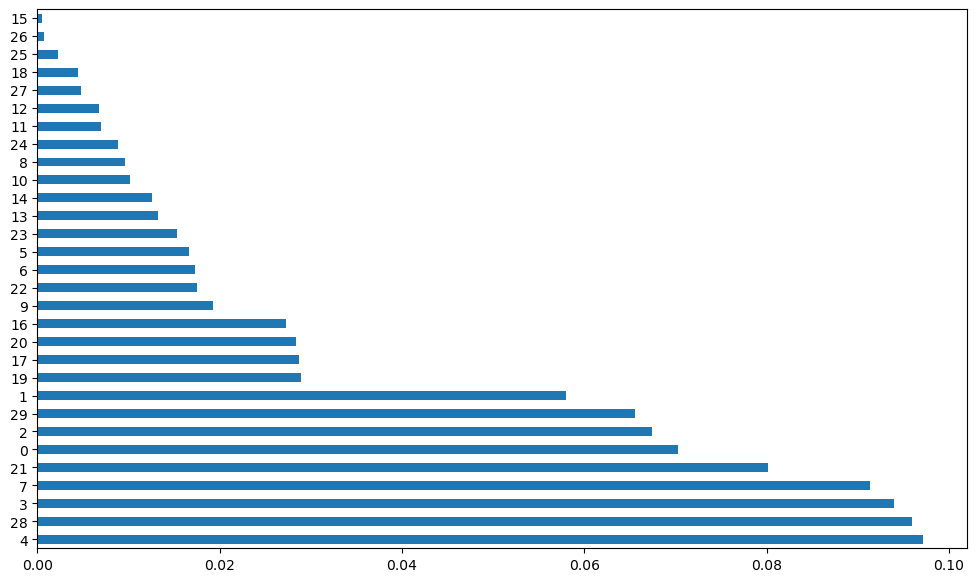

In [44]:
feature_imp(X, rf_clf).plot(kind='barh', figsize=(12,7), legend=False)

<Axes: >

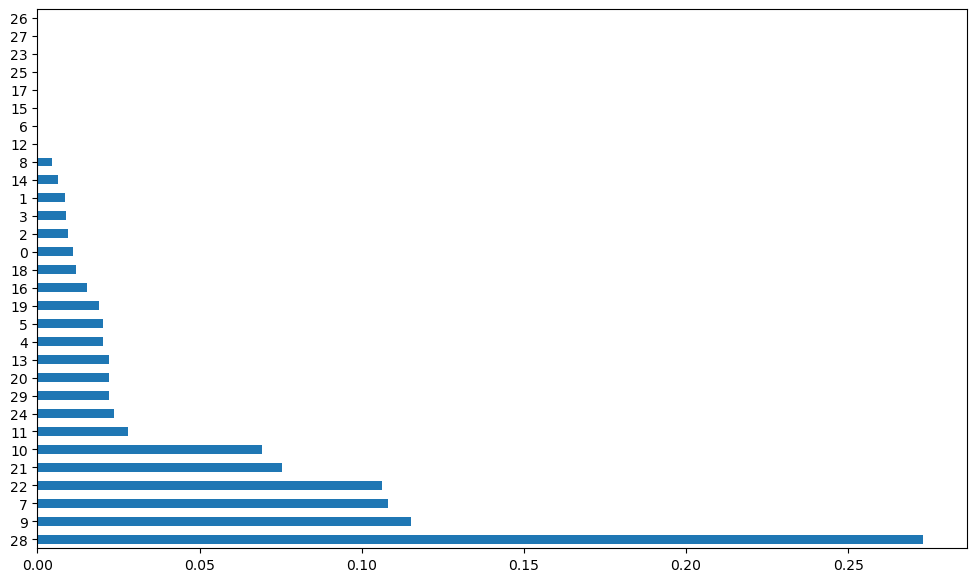

In [45]:
feature_imp(X, xgb_clf).plot(kind='barh', figsize=(12,7), legend=False)

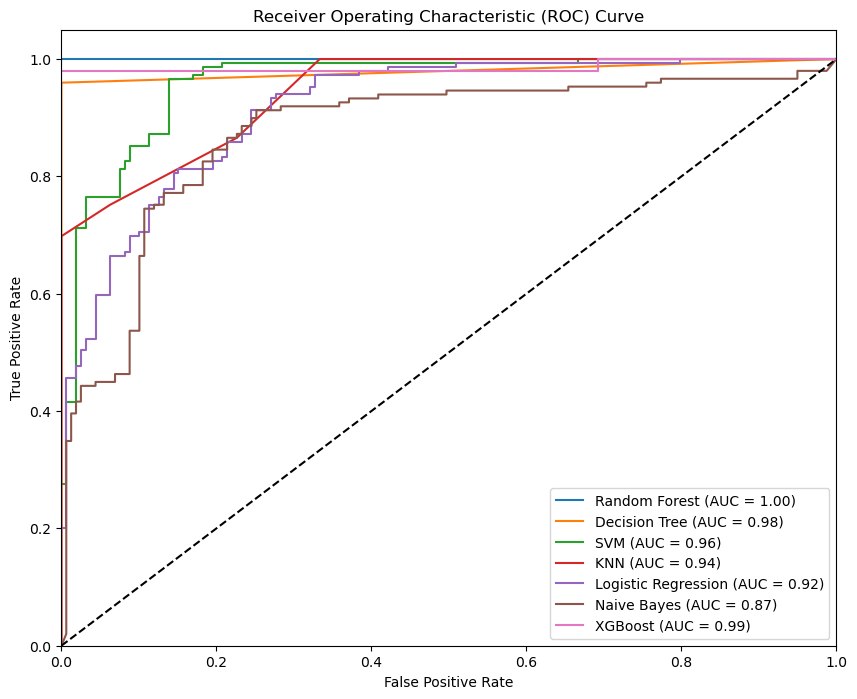

ROC AUC Values:
Random Forest: 1.00
Decision Tree: 0.98
SVM: 0.96
KNN: 0.94
Logistic Regression: 0.92
Naive Bayes: 0.87
XGBoost: 0.99


In [71]:
from sklearn.metrics import roc_curve, auc
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Plot ROC curve
plt.figure(figsize=(10, 8))
roc_auc_values = {}

for name, clf in classifiers.items():
    # Fit the model
    clf.fit(X_train, y_train)
    
    # Predict probabilities
    y_prob = clf.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and ROC AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    roc_auc_values[name] = roc_auc  # Store the AUC value
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print ROC AUC values
print("ROC AUC Values:")
for name, auc_value in roc_auc_values.items():
    print(f"{name}: {auc_value:.2f}")

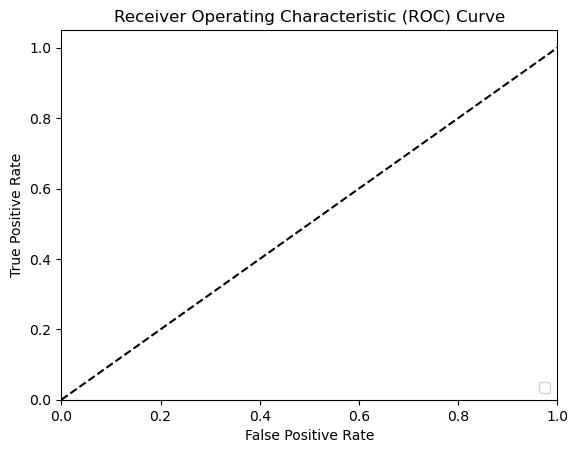

In [53]:
# Plot settings
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

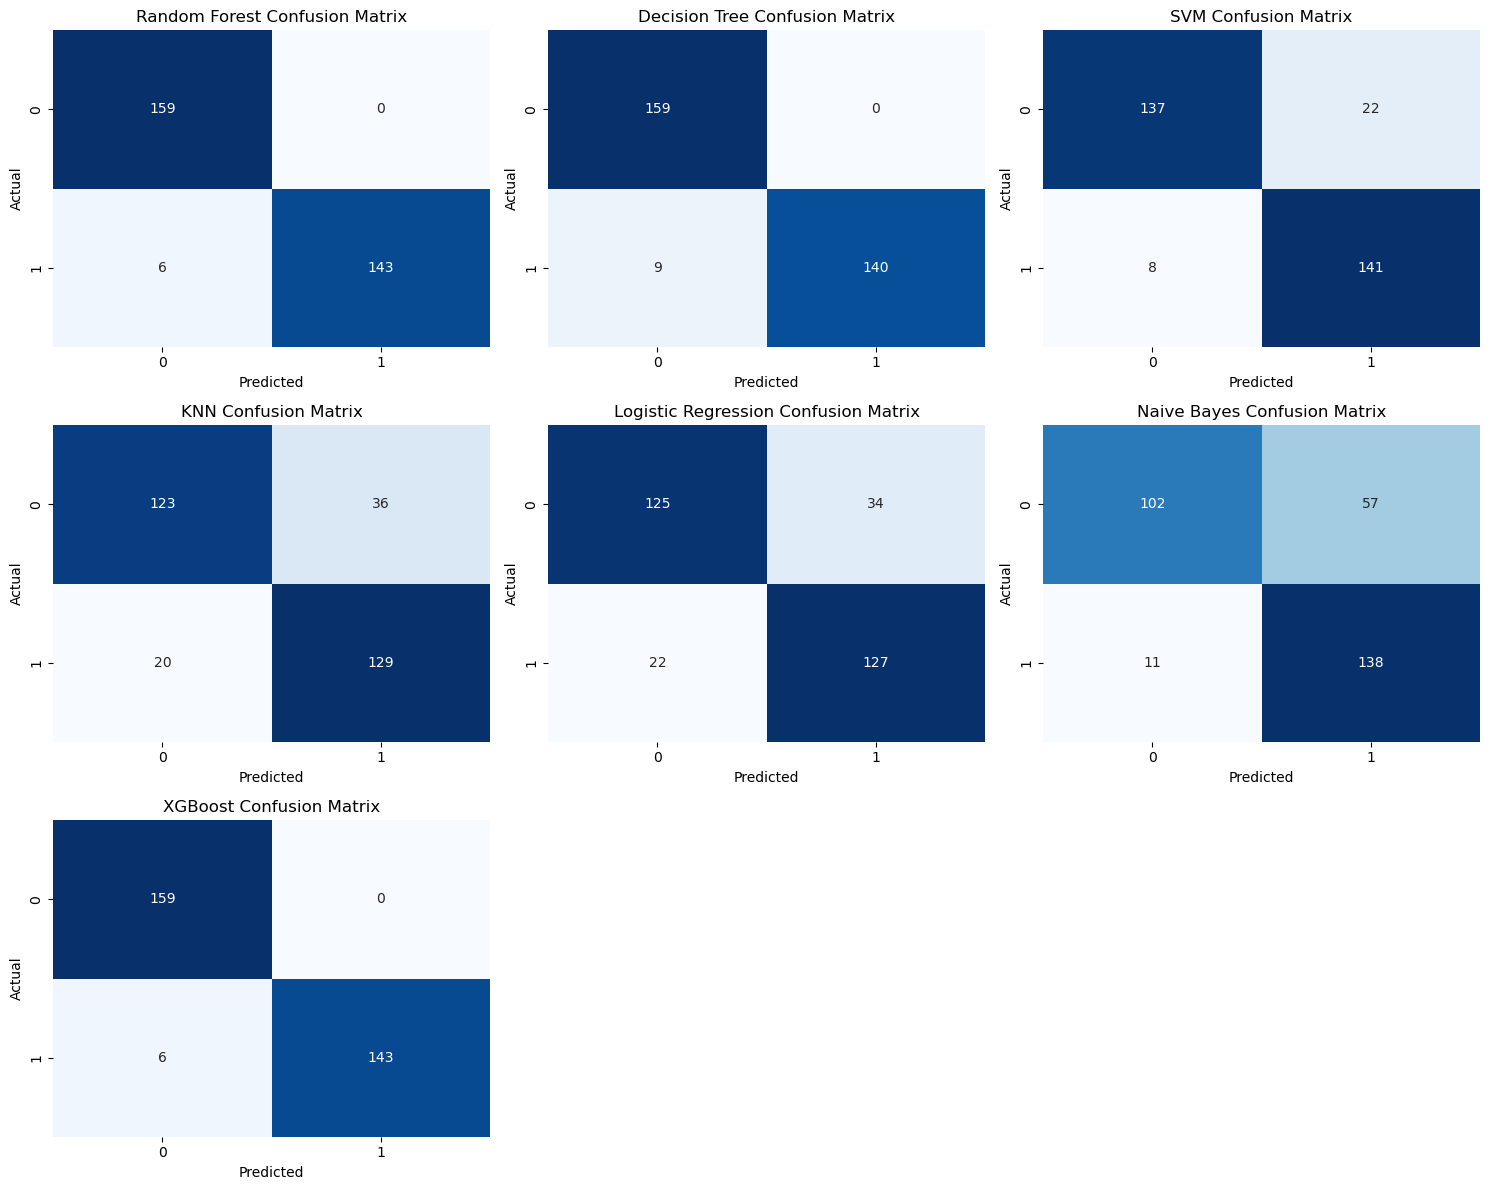

In [59]:
# Set up the plot
plt.figure(figsize=(15, 12))

# Train each model, make predictions, and plot confusion matrices
for i, (name, clf) in enumerate(classifiers.items(), start=1):
    # Train the model
    clf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.subplot(3, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

# Adjust layout
plt.tight_layout()
plt.show()

In [76]:
X_train.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
1020,0.50,0.48,-0.48,0.65,-0.91,False,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False
479,0.39,-0.21,-0.58,-0.79,0.96,False,True,True,False,False,...,False,False,False,False,True,False,False,False,False,True
227,-1.15,-0.78,-0.08,-0.00,-0.66,True,False,False,False,True,...,False,False,True,False,False,False,False,False,True,False
910,-0.49,0.48,-0.25,0.60,-0.40,False,True,False,False,True,...,False,False,True,False,False,False,False,False,False,True
362,-1.26,-0.55,-0.64,0.69,-0.74,True,False,False,False,True,...,False,True,False,False,False,False,False,False,True,False


In [77]:
y_train.head()

1020    1
479     0
227     1
910     0
362     1
Name: target, dtype: int64

In [67]:
# Check the training feature names
print("Training feature names:", X_train.columns.tolist())

Training feature names: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0', 'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1', 'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1', 'thal_2', 'thal_3']


In [66]:
# Prepare new data for predictions
new_data = pd.DataFrame({
    'age': [63],                # Example value
    'sex': [1],                 # Example value (1 = male)
    'cp': [3],                  # Example value (chest pain type)
    'trestbps': [145],          # Example value (resting blood pressure)
    'chol': [233],              # Example value (serum cholesterol)
    'fbs': [1],                 # Example value (fasting blood sugar)
    'restecg': [0],             # Example value (resting ECG results)
    'thalach': [150],           # Example value (max heart rate)
    'exang': [0],               # Example value (exercise induced angina)
    'oldpeak': [2.3],           # Example value (ST depression)
    'slope': [1],               # Example value (slope of ST segment)
    'ca': [0],                  # Example value (number of vessels)
    'thal': [1]                 # Example value (thalassemia)
})

# Ensure new_data has the same columns as X_train
new_data = new_data.reindex(columns=X_train.columns, fill_value=0)

# Make predictions on new data
new_prediction = rf.predict(new_data)
print(f"Random Forest Predicted outcome for new data: {new_prediction}")

Random Forest Predicted outcome for new data: [0]


In [80]:
import pickle
# Train each model and evaluate accuracy
accuracies = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    accuracies[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.2f}%")
# Identify the highest accuracy model (Random Forest)
best_model_name = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model_name]
print(f"\nHighest Accuracy Model: {best_model_name} with {best_accuracy:.2f}%")

# Save the Random Forest model
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(classifiers['Random Forest'], model_file)

print("Random Forest model saved as 'random_forest_model.pkl'.")

Random Forest Accuracy: 98.05%
Decision Tree Accuracy: 96.10%
SVM Accuracy: 90.26%
KNN Accuracy: 81.82%
Logistic Regression Accuracy: 81.82%
Naive Bayes Accuracy: 77.92%
XGBoost Accuracy: 98.05%

Highest Accuracy Model: Random Forest with 98.05%
Random Forest model saved as 'random_forest_model.pkl'.
